In [2]:
import numpy as np
import pandas as pd
import matplotlib

In [3]:
a_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Finland'],
    'Population (M)': [82.8, 67.2, 11.4, 5.5],
    'Capital': ['Berlin', 'Paris', 'Brussels', 'Helsinki']
})
a_df

,Capital,Country,Population (M)
0,Berlin,Germany,82.8
1,Paris,France,67.2
2,Brussels,Belgium,11.4
3,Helsinki,Finland,5.5


In [3]:
b_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Canada'],
    'HDI': [0.936, 0.901, 0.916, 0.926]
})
b_df

,Country,HDI
0,Germany,0.936
1,France,0.901
2,Belgium,0.916
3,Canada,0.926


In [4]:
left_merged_df = a_df.merge(b_df, on='Country', how='left')
left_merged_df

,Capital,Country,Population (M),HDI
0,Berlin,Germany,82.8,0.936
1,Paris,France,67.2,0.901
2,Brussels,Belgium,11.4,0.916
3,Helsinki,Finland,5.5,NaN


In [5]:
right_merged_df = a_df.merge(b_df, on='Country', how='right')
right_merged_df

,Capital,Country,Population (M),HDI
0,Berlin,Germany,82.8,0.936
1,Paris,France,67.2,0.901
2,Brussels,Belgium,11.4,0.916
3,NaN,Canada,NaN,0.926


In [6]:
outer_merged_df = a_df.merge(b_df, on='Country', how='outer')
outer_merged_df

,Capital,Country,Population (M),HDI
0,Berlin,Germany,82.8,0.936
1,Paris,France,67.2,0.901
2,Brussels,Belgium,11.4,0.916
3,Helsinki,Finland,5.5,NaN
4,NaN,Canada,NaN,0.926


In [7]:
aa_df = a_df.set_index("Country")
aa_df

,Capital,Population (M)
Country,,
Germany,Berlin,82.8
France,Paris,67.2
Belgium,Brussels,11.4
Finland,Helsinki,5.5


In [8]:
bb_df = b_df.set_index("Country")
bb_df

,HDI
Country,
Germany,0.936
France,0.901
Belgium,0.916
Canada,0.926


In [9]:
aa_df.join(bb_df, how='inner')
aa_df.join(bb_df, how='right')
aa_df.join(bb_df, how='outer')

,Capital,Population (M),HDI
Country,,,
Belgium,Brussels,11.4,0.916
Canada,NaN,NaN,0.926
Finland,Helsinki,5.5,NaN
France,Paris,67.2,0.901
Germany,Berlin,82.8,0.936


You can use .merge() when you want to merge based on a given column and .join() when you want to join on the index.

In [13]:
concat_df = pd.concat([aa_df, bb_df], axis="index")
concat_df

,Capital,HDI,Population (M)
Country,,,
Germany,Berlin,NaN,82.8
France,Paris,NaN,67.2
Belgium,Brussels,NaN,11.4
Finland,Helsinki,NaN,5.5
Germany,NaN,0.936,NaN
France,NaN,0.901,NaN
Belgium,NaN,0.916,NaN
Canada,NaN,0.926,NaN


In [4]:
countries_df = pd.read_csv('dictionary.csv')
countries_df.head(3)

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232


In [5]:
summer_df = pd.read_csv('summer.csv')
summer_df.rename(columns={"Country": "Code"}, inplace=True)
summer_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [6]:
winter_df = pd.read_csv('winter.csv')
winter_df.rename(columns={"Country": "Code"}, inplace=True)
winter_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [7]:
summer_countries_df = summer_df.merge(countries_df, on="Code")
summer_countries_df["Season"] = "Summer"
summer_countries_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.54346,Summer
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.54346,Summer
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.54346,Summer
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.54346,Summer
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.54346,Summer


In [8]:
winter_countries_df = winter_df.merge(countries_df, on="Code")
winter_countries_df["Season"] = "Winter"
winter_countries_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.5681,Winter
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.5681,Winter
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.5681,Winter
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.5681,Winter
4,1924,Chamonix,Curling,Curling,"ALDEERT, H.",FRA,Men,Curling,Bronze,France,66808385.0,36205.5681,Winter


In [10]:
all_df = pd.concat([summer_countries_df, winter_countries_df])
all_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.54346,Summer
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.54346,Summer
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.54346,Summer
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.54346,Summer
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.54346,Summer


In [11]:
all_count_df = all_df[all_df["Year"] >= 1984] \
    .groupby(["Country"]) \
    .count()[["Medal"]] \
    .sort_values(by="Medal", ascending=False)
all_count_df.head(10)

,Medal
Country,
United States,2472
Germany,1112
Russia,1031
Australia,891
China,889
Canada,801
Italy,632
"Korea, South",587
France,587


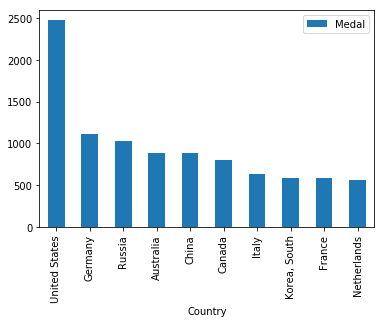

In [13]:
all_count_df.head(10).plot(kind="bar")

In [14]:
season_count_df = all_df.groupby(["Country", "Season"])["Medal"].count().unstack()
season_count_df.fillna(0, inplace=True)
season_count_df["Summer"] = season_count_df["Summer"].astype(int)
season_count_df["Winter"] = season_count_df["Winter"].astype(int)
season_count_df.head(10)

Season,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australia,1189,15
Austria,146,280
Azerbaijan,26,0
Bahamas,27,0
Bahrain,1,0


In [15]:
season_count_df["Total"] = all_count_df
season_count_df.head(10)

Season,Summer,Winter,Total
Country,,,
Afghanistan,2,0,2.0
Algeria,15,0,15.0
Argentina,259,0,173.0
Armenia,11,0,11.0
Australia,1189,15,891.0
Austria,146,280,205.0
Azerbaijan,26,0,26.0
Bahamas,27,0,23.0
Bahrain,1,0,1.0


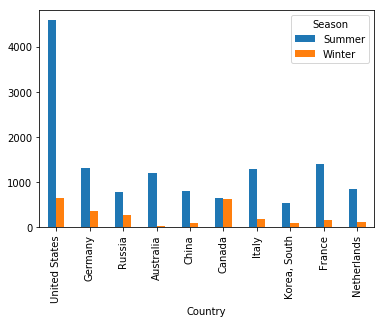

In [16]:
season_count_df.sort_values(by="Total", ascending=False)[["Summer", "Winter"]].head(10).plot(kind="bar")